In [1]:
from FASTSim_Package.envs.FASTSim_RL_Environment import *
from utils import *   # import replay buffer for experienced replay and plotting function
from DQN_Agent import *
import pandas as pd
import numpy as np

In [2]:
env = gym.make('FASTSim-v0')
a = env.action_space
print(env.state_space, a)

Box(2,) Discrete(11)


Driving simulation round 1 completed. Assigning outputs and calculating results...
 ------- Driving Simulation Round: 1, Score: 135819.06, Average Score: 135819.06 ------- 
Driving simulation round 2 completed. Assigning outputs and calculating results...
 ------- Driving Simulation Round: 2, Score: 135846.48, Average Score: 135846.48 ------- 
Driving simulation round 3 completed. Assigning outputs and calculating results...
 ------- Driving Simulation Round: 3, Score: 135848.53, Average Score: 135848.53 ------- 
Driving simulation round 4 completed. Assigning outputs and calculating results...
 ------- Driving Simulation Round: 4, Score: 135846.79, Average Score: 135846.79 ------- 
Driving simulation round 5 completed. Assigning outputs and calculating results...
 ------- Driving Simulation Round: 5, Score: 135833.21, Average Score: 135833.21 ------- 
Driving simulation round 6 completed. Assigning outputs and calculating results...
 ------- Driving Simulation Round: 6, Score: 135842.

Driving simulation round 43 completed. Assigning outputs and calculating results...
 ------- Driving Simulation Round: 43, Score: 135845.14, Average Score: 135845.14 ------- 
Driving simulation round 44 completed. Assigning outputs and calculating results...
 ------- Driving Simulation Round: 44, Score: 135840.40, Average Score: 135840.40 ------- 
Driving simulation round 45 completed. Assigning outputs and calculating results...
 ------- Driving Simulation Round: 45, Score: 135841.20, Average Score: 135841.20 ------- 
Driving simulation round 46 completed. Assigning outputs and calculating results...
 ------- Driving Simulation Round: 46, Score: 135846.52, Average Score: 135846.52 ------- 
Driving simulation round 47 completed. Assigning outputs and calculating results...
 ------- Driving Simulation Round: 47, Score: 135852.90, Average Score: 135852.90 ------- 
Driving simulation round 48 completed. Assigning outputs and calculating results...
 ------- Driving Simulation Round: 48, Sc

Driving simulation round 89 completed. Assigning outputs and calculating results...
 ------- Driving Simulation Round: 89, Score: 135848.52, Average Score: 135848.52 ------- 
Driving simulation round 90 completed. Assigning outputs and calculating results...
 ------- Driving Simulation Round: 90, Score: 135850.02, Average Score: 135850.02 ------- 
INFO:tensorflow:Assets written to: dqn_model/assets
Driving simulation round 91 completed. Assigning outputs and calculating results...
 ------- Driving Simulation Round: 91, Score: 135846.27, Average Score: 135846.27 ------- 
Driving simulation round 92 completed. Assigning outputs and calculating results...
 ------- Driving Simulation Round: 92, Score: 135850.74, Average Score: 135850.74 ------- 
Driving simulation round 93 completed. Assigning outputs and calculating results...
 ------- Driving Simulation Round: 93, Score: 135838.30, Average Score: 135838.30 ------- 
Driving simulation round 94 completed. Assigning outputs and calculating 

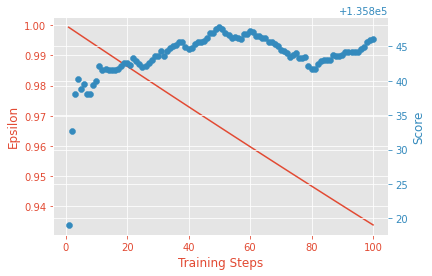

In [3]:
if __name__ == '__main__':
    
    n_simulations = 100  # specify the number of driving simulations wanted
    env = gym.make('FASTSim-v0')  
    agent = Agent(gamma=0.99, lr=0.005, input_dims=2, n_actions=11, batch_size=64, 
                  epsilon=1.0, eps_dec=0.9999995, eps_min=0.0, mem_size=1000000)
        
    scores = []
    eps_history = []

    for i in range(1, n_simulations+1):
        done = False
        score = 0
        state = env.reset()
        env.reset_list()
        while not done:
            action = agent.choose_action(state)
            state_, reward, done, info = env.step(action)
            score += reward
            agent.remember(state, action, reward, state_, done) # store experience
            state = state_   # new state -- state
            agent.learn()   
        
        eps_history.append(agent.epsilon)
        scores.append(score)
    
        #avg_score = np.mean(scores[max(0, i-100):(i+1)])
        avg_score = np.mean(scores[max(0, i-1):(i+1)])
        print(' ------- Driving Simulation Round: {}, Score: {:.2f}, Average Score: {:.2f} ------- '\
              .format(i, score, avg_score))
        
        if i % 10 == 0 and i > 0:
            agent.save_model()

    filename = 'FASTSim.png'
    
    # Results
    df = pd.DataFrame.from_dict(env.output)[['soc','fcKwInAch','fcKwOutAch','essKwOutAch',
                                             'mcMechKwOutAch','auxInKw','mcElecKwInAch','mpgge',
                                             'transKwInAch','mcMechKw4ForcedFc',
                                             'canPowerAllElectrically','fcForcedState']]
    df['speed'] = env.cyc['cycMps'] * 2.23694  # Convert mps to mph 
    print('MPG is: ', df['mpgge'].iloc[-1])

    x = [i+1 for i in range(n_simulations)]
    plot_learning_curve(x, scores, eps_history, filename)

MPG is:  63.2431382369964


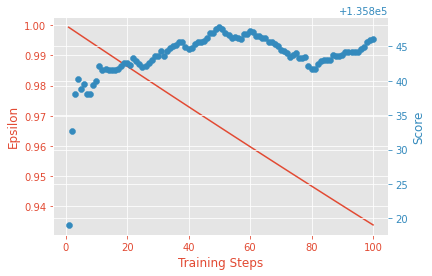

In [4]:
# Results
df = pd.DataFrame.from_dict(env.output)[['soc','fcKwInAch','fcKwOutAch','essKwOutAch',
                                         'mcMechKwOutAch','auxInKw','mcElecKwInAch','mpgge',
                                         'transKwInAch','mcMechKw4ForcedFc',
                                         'canPowerAllElectrically','fcForcedState']]
df['speed'] = env.cyc['cycMps'] * 2.23694  # Convert mps to mph 
print('MPG is: ', df['mpgge'].iloc[-1])

x = [i+1 for i in range(n_simulations)]
plot_learning_curve(x, scores, eps_history, filename)

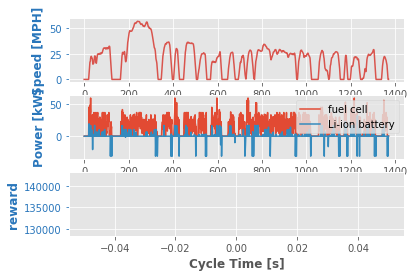

In [5]:
########################################################################################
#  plot
ax = plt.subplot(3,1,1)
speed_line = df.speed.plot(color='xkcd:pale red', ax=ax, label='Speed')
ax.set_ylabel('Speed [MPH]', weight='bold', color='xkcd:bluish')
ax.tick_params('y', colors='xkcd:bluish')

ax = plt.subplot(3,1,2)
line1 = df.fcKwOutAch.plot(ax=ax, label='kW')
line2 = df.essKwOutAch.plot(ax=ax, label='kW')
ax.set_ylabel('Power [kW]', weight='bold', color='xkcd:bluish')
ax.tick_params('y', colors='xkcd:bluish')
ax.legend(['fuel cell','Li-ion battery'])

ax11 = plt.subplot(3,1,3)
plt.plot(score)
ax11.set_ylabel('reward', weight='bold', color='xkcd:bluish')
# speed_line = df.fuelKgAch.plot(color='xkcd:pale red', ax=ax11, label='Speed')
# ax11.set_ylabel('fuel burned [kg]', weight='bold', color='xkcd:bluish')
ax11.set_xlabel('Cycle Time [s]', weight='bold')
ax11.tick_params('y', colors='xkcd:bluish')